<head>
                SENTIMENTAL ANALYSIS AND PREDICTIONS OF FACULTY FEEDBACK USING MACHINE LEARNING
</head>

In [ ]:
#Importing the data set using pandas
import pandas as pd
df1=pd.read_excel('pro1ds.xlsx')

In [3]:
df1

,SNO,Dept of Staff,Staff_Code,SUB_NAME,Academic_Year,Year_Students,Avg_feedback
0,1,Aero,1060,Solid Mechanics,2019,2,3.400000
1,2,Aero,1060,Fatigue and Fracture,2019,4,3.700000
2,3,Aero,1065,Experimental Stress Analysis,2019,4,3.590000
3,4,Aero,1065,Engineering Graphics,2019,1,4.340000
4,5,Aero,1064,Production Engineering,2019,2,3.840000
...,...,...,...,...,...,...,...
1442,722,Physics,2451,Life Science for Engineers,2020,2,4.459574
1443,723,Physics,2452,Environmental Science and Engineering (Non Cre...,2020,1,4.093878
1444,724,Physics,2452,Physics of Materials + Lab,2020,1,4.250000
1445,725,Physics,2452,Physics of Materials + Lab,2020,1,4.618605


In [4]:
#Basic information of the data set
df1.info

<bound method DataFrame.info of       SNO Dept of Staff  Staff_Code  \
0       1          Aero        1060   
1       2          Aero        1060   
2       3          Aero        1065   
3       4          Aero        1065   
4       5          Aero        1064   
...   ...           ...         ...   
1442  722       Physics        2451   
1443  723       Physics        2452   
1444  724       Physics        2452   
1445  725       Physics        2452   
1446  726       Physics        2401   

                                               SUB_NAME  Academic_Year  \
0                                      Solid Mechanics            2019   
1                                 Fatigue and Fracture            2019   
2                         Experimental Stress Analysis            2019   
3                                  Engineering Graphics           2019   
4                               Production Engineering            2019   
...                                                 ...

In [5]:
#checking the null values
df1.isnull().sum()

SNO              0
Dept of Staff    0
Staff_Code       0
SUB_NAME         0
Academic_Year    0
Year_Students    0
Avg_feedback     0
dtype: int64

In [6]:
#changing the values of score if the average feedback = 1 if >=3.5 and 0 if <3.5 
df1.loc[df1['Avg_feedback'] >= 3.5, 'score'] = 1
df1.loc[df1['Avg_feedback'] < 3.5, 'score'] = 0



In [7]:
df1['score']

0       0.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1442    1.0
1443    1.0
1444    1.0
1445    1.0
1446    1.0
Name: score, Length: 1447, dtype: float64

In [8]:
df1.head()

,SNO,Dept of Staff,Staff_Code,SUB_NAME,Academic_Year,Year_Students,Avg_feedback,score
0,1,Aero,1060,Solid Mechanics,2019,2,3.40,0.0
1,2,Aero,1060,Fatigue and Fracture,2019,4,3.70,1.0
2,3,Aero,1065,Experimental Stress Analysis,2019,4,3.59,1.0
3,4,Aero,1065,Engineering Graphics,2019,1,4.34,1.0
4,5,Aero,1064,Production Engineering,2019,2,3.84,1.0


In [9]:
#Checking the unique elements of SUB_NAME
len(df1['SUB_NAME'].unique())

436

In [10]:
#Converting all the values of sub_name to dictionary
df1.SUB_NAME.value_counts().to_dict()

{'Technical English': 56,
 'Linear Algebra and Applied Calculus': 31,
 'Engineering Graphics': 25,
 'Programming Logic': 19,
 'Algebra and Calculus': 15,
 'Engineering Practices Lab (Civil & Mechanical)': 15,
 'Environmental Science and Engineering (Non Credit Course)': 15,
 'Engineering Practices Lab (Electrical and Electronics)': 14,
 'Distributed Systems': 14,
 'Programming using C + Lab': 14,
 'Life Science for Engineers': 14,
 'Kinematics of Machinery': 14,
 'Environmental Science and Engineering': 14,
 'Indian Constitution and Freedom Movement(Non Credit Course)': 14,
 'Indian Constitution and Freedom Movement': 13,
 'Programming using C': 13,
 'Cryptography and Network Security': 12,
 'Data Analytics': 12,
 'Transforms and Partial  Differential Equations ': 12,
 'Internet Programming': 10,
 'Theory of Computation': 10,
 'Applied Calculus': 10,
 'Digital Image Processing': 10,
 'Graphics and Multimedia': 10,
 'Electromagnetic Theory': 10,
 'Computer Architecture': 10,
 'Dynamics 

In [11]:
#Converting Cateogorical values to numerical values using Frequency mapping
df1_frequency_map = df1.SUB_NAME.value_counts().to_dict()

In [12]:
df1.SUB_NAME = df1.SUB_NAME.map(df1_frequency_map)

In [13]:
df1

,SNO,Dept of Staff,Staff_Code,SUB_NAME,Academic_Year,Year_Students,Avg_feedback,score
0,1,Aero,1060,1,2019,2,3.400000,0.0
1,2,Aero,1060,1,2019,4,3.700000,1.0
2,3,Aero,1065,1,2019,4,3.590000,1.0
3,4,Aero,1065,25,2019,1,4.340000,1.0
4,5,Aero,1064,1,2019,2,3.840000,1.0
...,...,...,...,...,...,...,...,...
1442,722,Physics,2451,14,2020,2,4.459574,1.0
1443,723,Physics,2452,15,2020,1,4.093878,1.0
1444,724,Physics,2452,8,2020,1,4.250000,1.0
1445,725,Physics,2452,8,2020,1,4.618605,1.0


In [14]:
df1.SUB_NAME.tail()

1442    14
1443    15
1444     8
1445     8
1446     1
Name: SUB_NAME, dtype: int64

In [15]:
#Converting the Subject name to numerical values
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
staff_labels = gle.fit_transform(df1['Dept of Staff'])
staff_mappings = {index: label for index, label in
                  enumerate(gle.classes_)}
staff_mappings


{0: 'Aero',
 1: 'Auto',
 2: 'BME',
 3: 'BT',
 4: 'CSE',
 5: 'Chemical',
 6: 'Chemistry',
 7: 'Civil',
 8: 'ECE',
 9: 'EEE',
 10: 'English',
 11: 'FT',
 12: 'GERMAN',
 13: 'IT',
 14: 'MBA',
 15: 'MCT',
 16: 'Maths',
 17: 'Mech',
 18: 'Physics'}

In [16]:
df1['Dept of Staff'] = staff_labels


In [17]:
df1

,SNO,Dept of Staff,Staff_Code,SUB_NAME,Academic_Year,Year_Students,Avg_feedback,score
0,1,0,1060,1,2019,2,3.400000,0.0
1,2,0,1060,1,2019,4,3.700000,1.0
2,3,0,1065,1,2019,4,3.590000,1.0
3,4,0,1065,25,2019,1,4.340000,1.0
4,5,0,1064,1,2019,2,3.840000,1.0
...,...,...,...,...,...,...,...,...
1442,722,18,2451,14,2020,2,4.459574,1.0
1443,723,18,2452,15,2020,1,4.093878,1.0
1444,724,18,2452,8,2020,1,4.250000,1.0
1445,725,18,2452,8,2020,1,4.618605,1.0


C:\Users\susin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\susin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\susin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\susin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\susin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


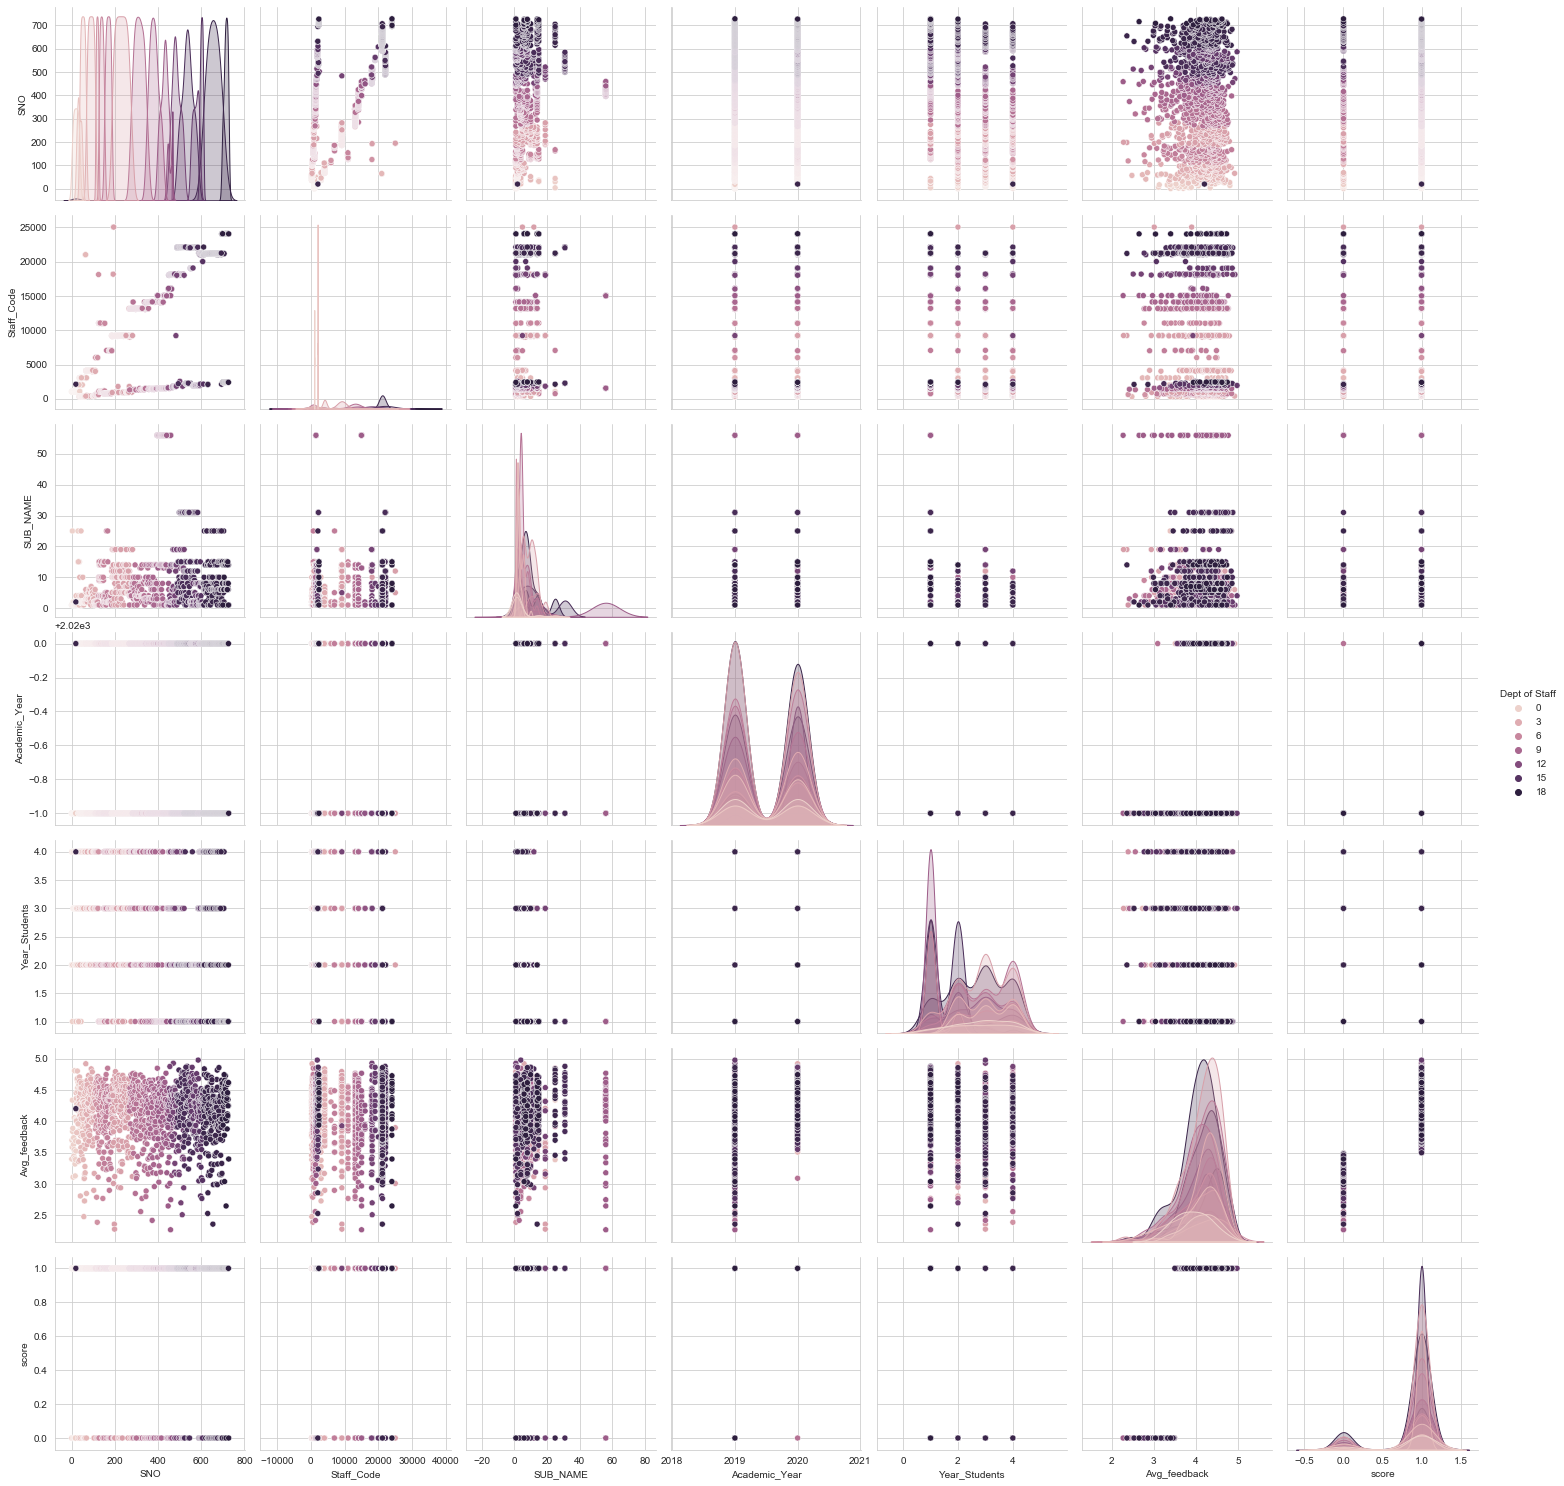

In [32]:
#EXPLORATORY DATA ANALYSIS
import seaborn as sns
pt.close()
sns.set_style("whitegrid");
sns.pairplot(df1, hue = "Dept of Staff", height=3);
pt.show()


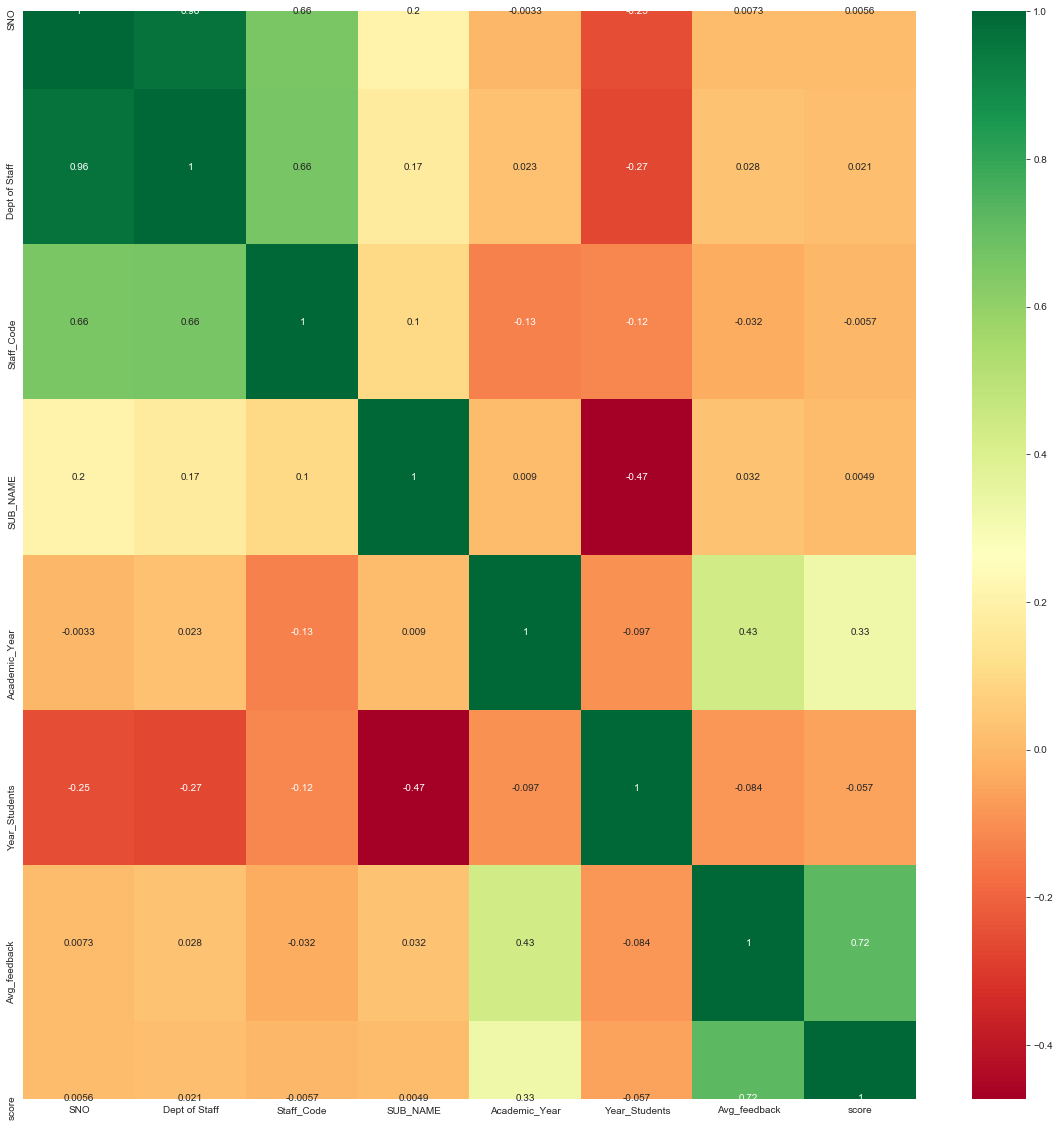

In [34]:
#CHECKING THE CORRELATION BETWEEN FEATURES USING HEAT MAP
import seaborn as sns
corrmat = df1.corr()
top_corr_features=corrmat.index
pt.figure(figsize=(20,20))
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap='RdYlGn')

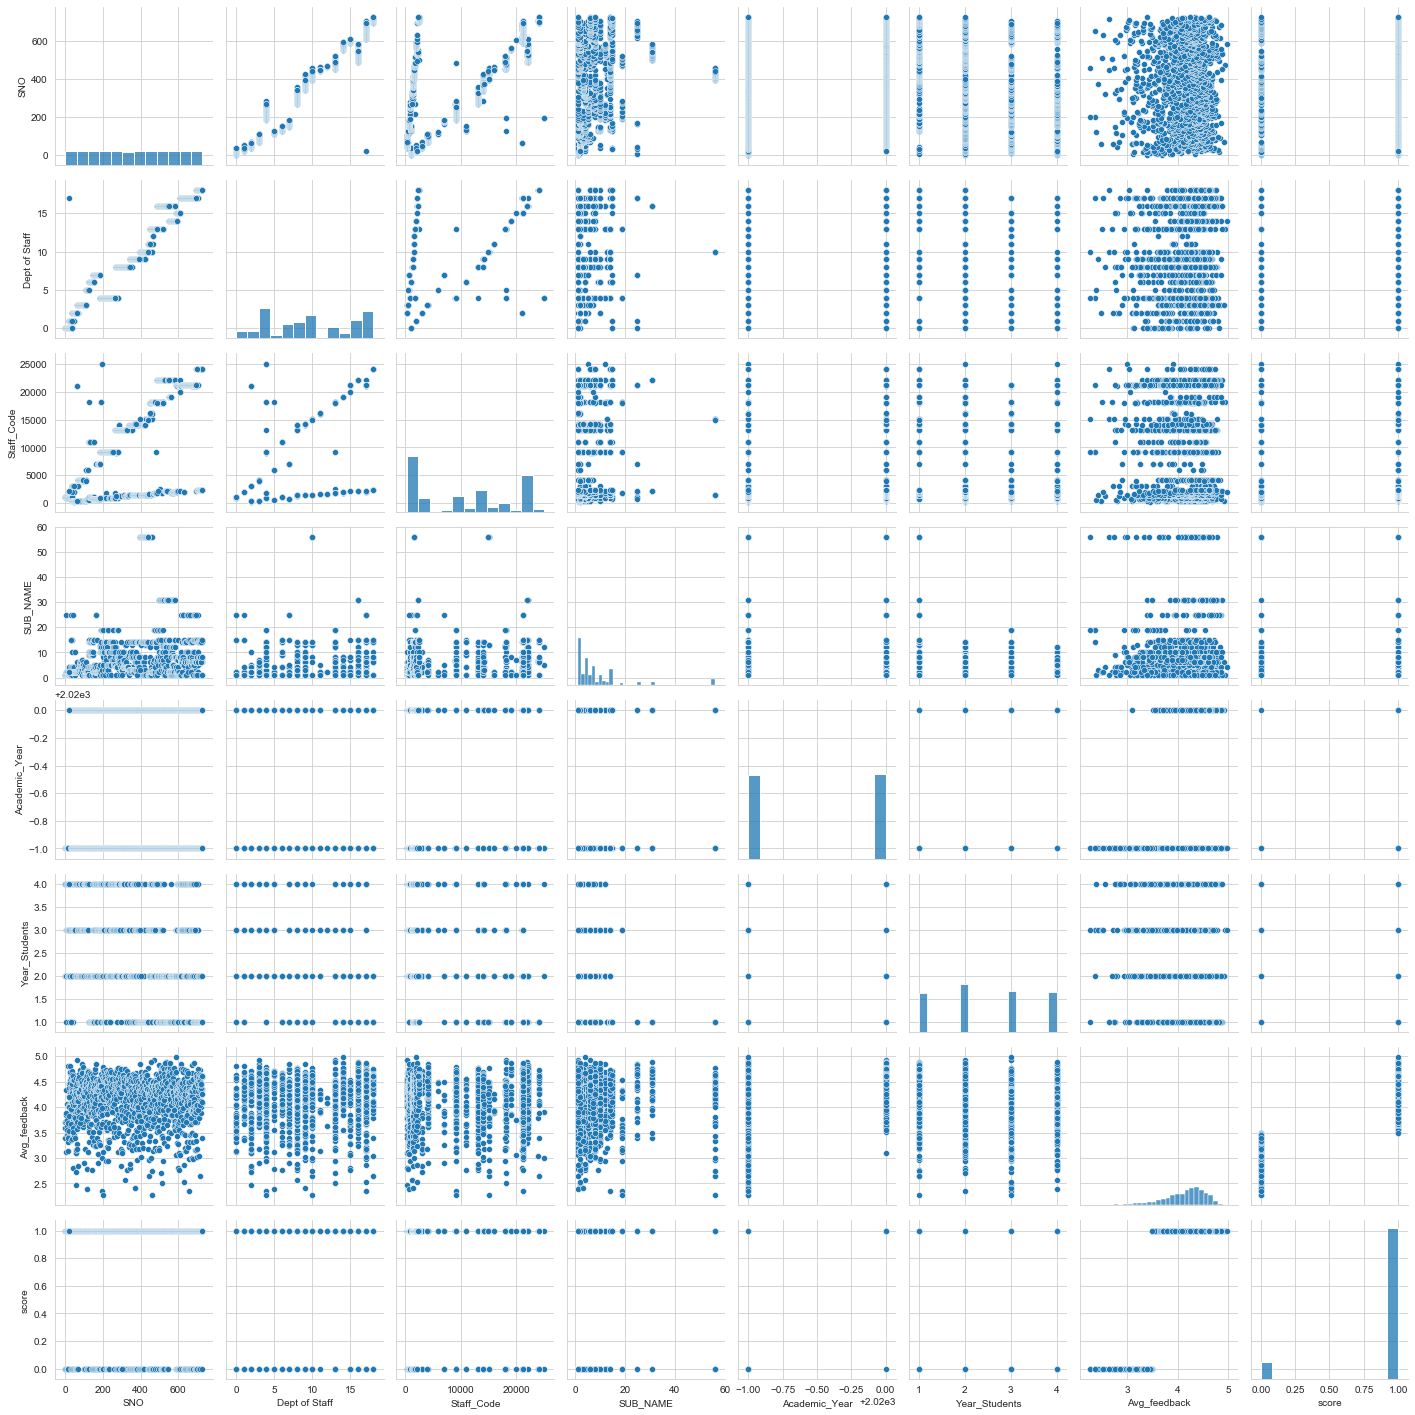

In [35]:
#PAIRPLOT
sns.pairplot(df1)

In [18]:
df1.columns

Index(['SNO', 'Dept of Staff', 'Staff_Code', 'SUB_NAME', 'Academic_Year',
       'Year_Students', 'Avg_feedback', 'score'],
      dtype='object')

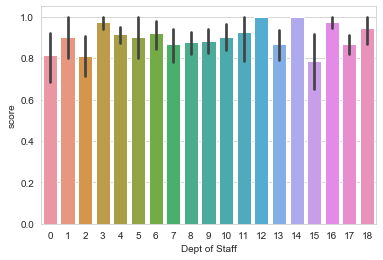

In [37]:
#BAR GRAPH
import seaborn as sns
import matplotlib.pyplot as pt
sns.barplot(x = 'Dept of Staff',y = 'score',data = df1)
pt.show()


In [19]:
newdf=df1[['SNO','Dept of Staff','Staff_Code','SUB_NAME','Academic_Year','Year_Students','score']]

In [20]:
newdf

,SNO,Dept of Staff,Staff_Code,SUB_NAME,Academic_Year,Year_Students,score
0,1,0,1060,1,2019,2,0.0
1,2,0,1060,1,2019,4,1.0
2,3,0,1065,1,2019,4,1.0
3,4,0,1065,25,2019,1,1.0
4,5,0,1064,1,2019,2,1.0
...,...,...,...,...,...,...,...
1442,722,18,2451,14,2020,2,1.0
1443,723,18,2452,15,2020,1,1.0
1444,724,18,2452,8,2020,1,1.0
1445,725,18,2452,8,2020,1,1.0


In [21]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as pt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [22]:
#feature Specification
x, y = make_classification(
    n_samples=1447,
    n_features=6,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)
print(x)

[[-1.19934037  0.38419572  0.80279237 -0.7321544  -0.54847514 -1.34166712]
 [-0.09950303 -0.89984756 -1.0315411  -0.80130787  0.60263159 -0.60918402]
 [ 1.10106491  0.04364108  0.50201813  1.07391929 -0.68021616 -0.19208246]
 ...
 [ 0.67818324 -0.20098616 -0.24475479  0.54658506  0.15778    -0.62283098]
 [-0.08115742 -0.09694087  0.65814857  1.66350519  2.40193074 -0.71447258]
 [-1.41851456 -1.97623579  1.27682601  1.44893992 -0.5614114   0.6589713 ]]


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)


In [29]:
print(x_test)

[[-1.245077    1.21630866  0.68632132  1.65448512 -1.36880914  0.14076148]
 [ 0.82945861 -0.60918015 -0.47197872 -0.38663323 -0.67182311 -0.79491067]
 [ 0.99944657 -2.17001082  1.60436724  0.33137668  1.44505983  0.94410726]
 ...
 [-0.67442863  1.17783413 -1.6902171  -0.10340256  0.75477036 -0.74682006]
 [ 0.24485879 -0.24525943 -0.43659867 -1.32082634 -1.45587469  0.91353802]
 [ 0.1639371  -0.81026825 -0.2112131   0.05771301  0.69492582  3.16570085]]


In [30]:
print(y_test)

[1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0
 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1
 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1
 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1
 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0
 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1
 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1
 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0
 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1]


In [24]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

C:\Users\susin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
print(log_reg.coef_)
print(log_reg.intercept_)

[[-1.48348209e-02 -1.48655992e-02  6.97667029e-04  6.98278063e-02
  -1.92358708e-02  2.87153430e+00]]
[0.55900096]


In [26]:
y_pred = log_reg.predict(x_test)
print(y_pred)

[1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0
 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1
 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1
 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1
 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0
 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1
 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0
 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1]


In [27]:
confusion_matrix(y_test, y_pred)


array([[163,   5],
       [ 23, 171]], dtype=int64)

In [28]:
accuracy_score(y_pred, y_test)


0.9226519337016574